# Libraries

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.metrics import(precision_score, recall_score, confusion_matrix, classification_report, accuracy_score)
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Dataset Description

In [310]:
# Run this cell if you are using Google Colab
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Project/mushrooms null.csv")
df.replace("NaN", np.nan, inplace=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,NaN,o,NaN,n,n,m
3,p,x,y,w,t,p,NaN,c,n,n,...,s,w,w,p,NaN,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,NaN,g


In [ ]:
# If you are using Google Colab no need to run this cell.
df = pd.read_csv('Dataset/mushrooms.csv')
df.replace("NaN", np.nan, inplace=True)
df.head()

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     7727 non-null   object
 1   cap-shape                 7737 non-null   object
 2   cap-surface               7760 non-null   object
 3   cap-color                 7731 non-null   object
 4   bruises                   7735 non-null   object
 5   odor                      7735 non-null   object
 6   gill-attachment           7714 non-null   object
 7   gill-spacing              7761 non-null   object
 8   gill-size                 7739 non-null   object
 9   gill-color                7704 non-null   object
 10  stalk-shape               7764 non-null   object
 11  stalk-root                7709 non-null   object
 12  stalk-surface-above-ring  7702 non-null   object
 13  stalk-surface-below-ring  7745 non-null   object
 14  stalk-color-above-ring  

In [312]:
df.shape

(8124, 23)

### Target

In [313]:
target = 'class'

### Bar Chart

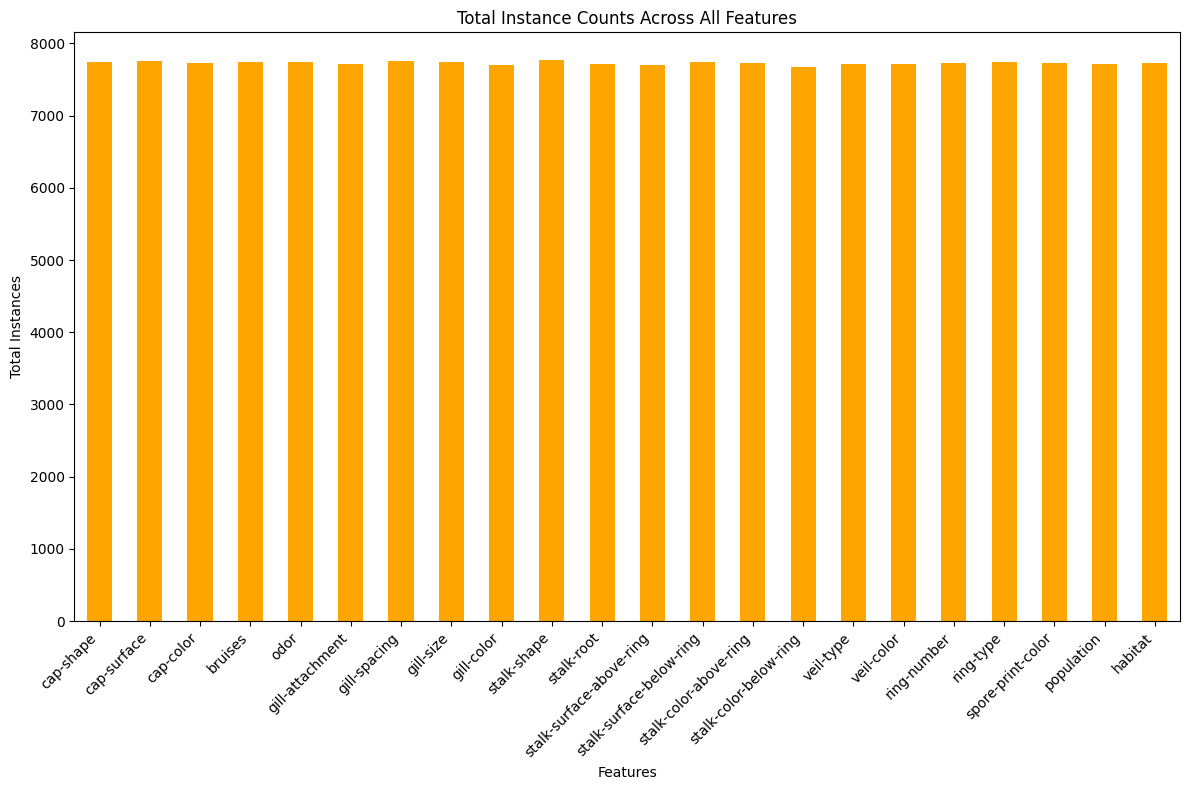

In [314]:
totalCounts = df.loc[:, df.columns != target].count()

# Plotting the bar chart for total instance counts across all columns except the target
plt.figure(figsize=(12, 8))
totalCounts.plot(kind='bar', color='orange')
plt.title('Total Instance Counts Across All Features')
plt.xlabel('Features')
plt.ylabel('Total Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Class Distribution

In [315]:
# unique class & their counts in the dataset
classCounts = df[target].value_counts()
print(classCounts)

class
e    4014
p    3713
Name: count, dtype: int64


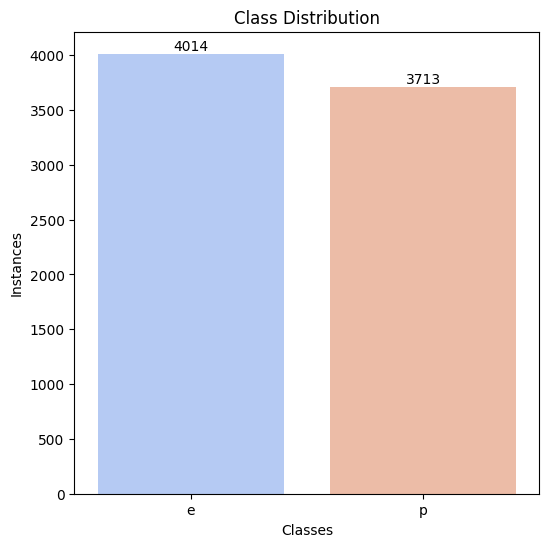

In [316]:
plt.figure(figsize=(6,6))
sns.barplot(x = classCounts.index, y = classCounts.values, palette = 'coolwarm', hue = classCounts.index, legend = False)

plt.xlabel('Classes')
plt.ylabel('Instances')
plt.title('Class Distribution')

for i, c in enumerate(classCounts.values):
    plt.text(i, c, str(c), ha = 'center', va = 'bottom')

plt.show()

# Data Preprocessing

In [317]:
df.isnull().sum()

,0
class,397
cap-shape,387
cap-surface,364
cap-color,393
bruises,389
odor,389
gill-attachment,410
gill-spacing,363
gill-size,385
gill-color,420


In [318]:
# Handling missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)  # Replace with mode for categorical
        else:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)  # Replace with median for numerical

In [319]:
# Dropping veil-type column as it's only related to p class
df.drop(['veil-type'], axis=1, inplace=True)

# Drop NULL value rows
df = df.dropna(axis=0, how='any')

print(df.shape)

(8124, 22)


# Categorical to Numerical

In [320]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert all categorical columns to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,4,1


# Scaling

In [321]:
x = df.drop(target, axis=1)
y = df[target]

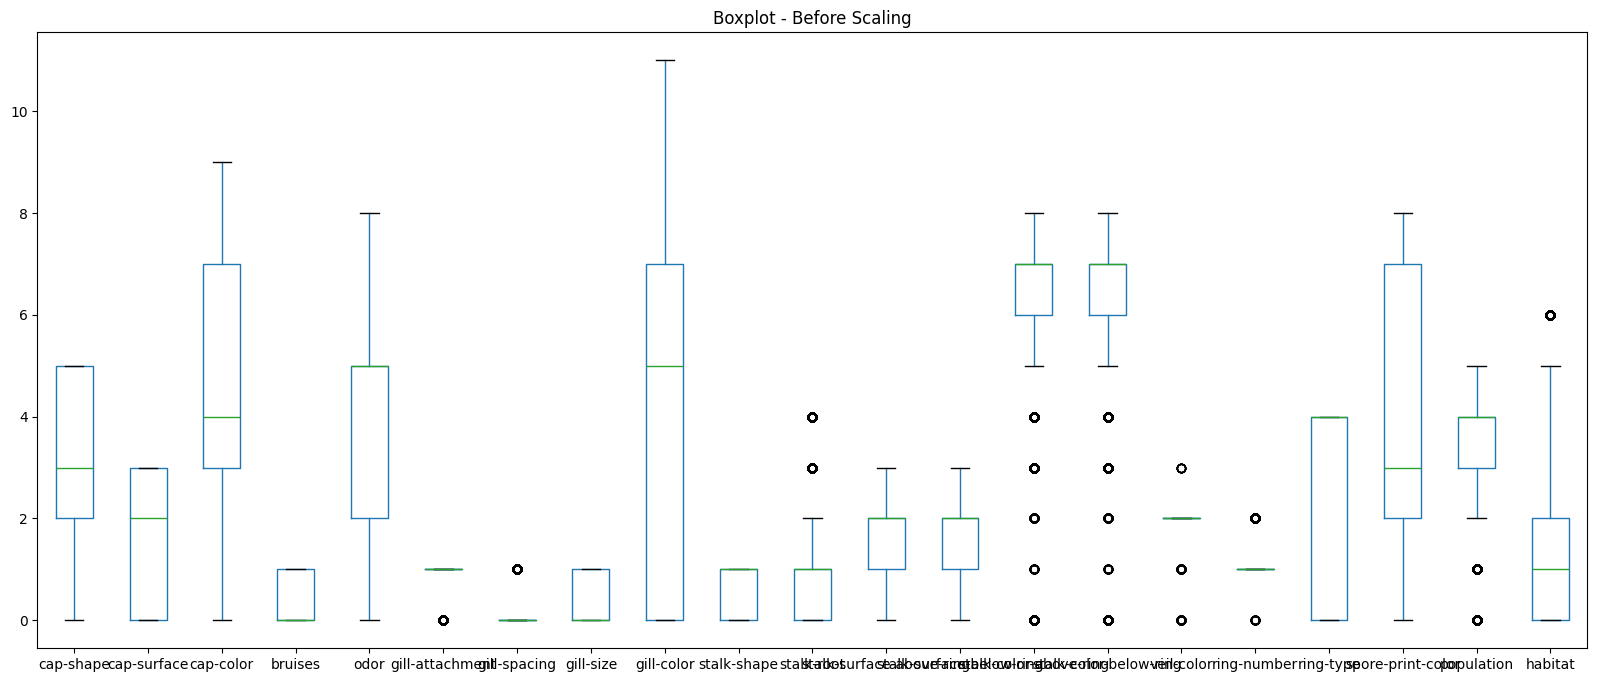

In [322]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - Before Scaling')
plt.show()

In [323]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.8,0.166667


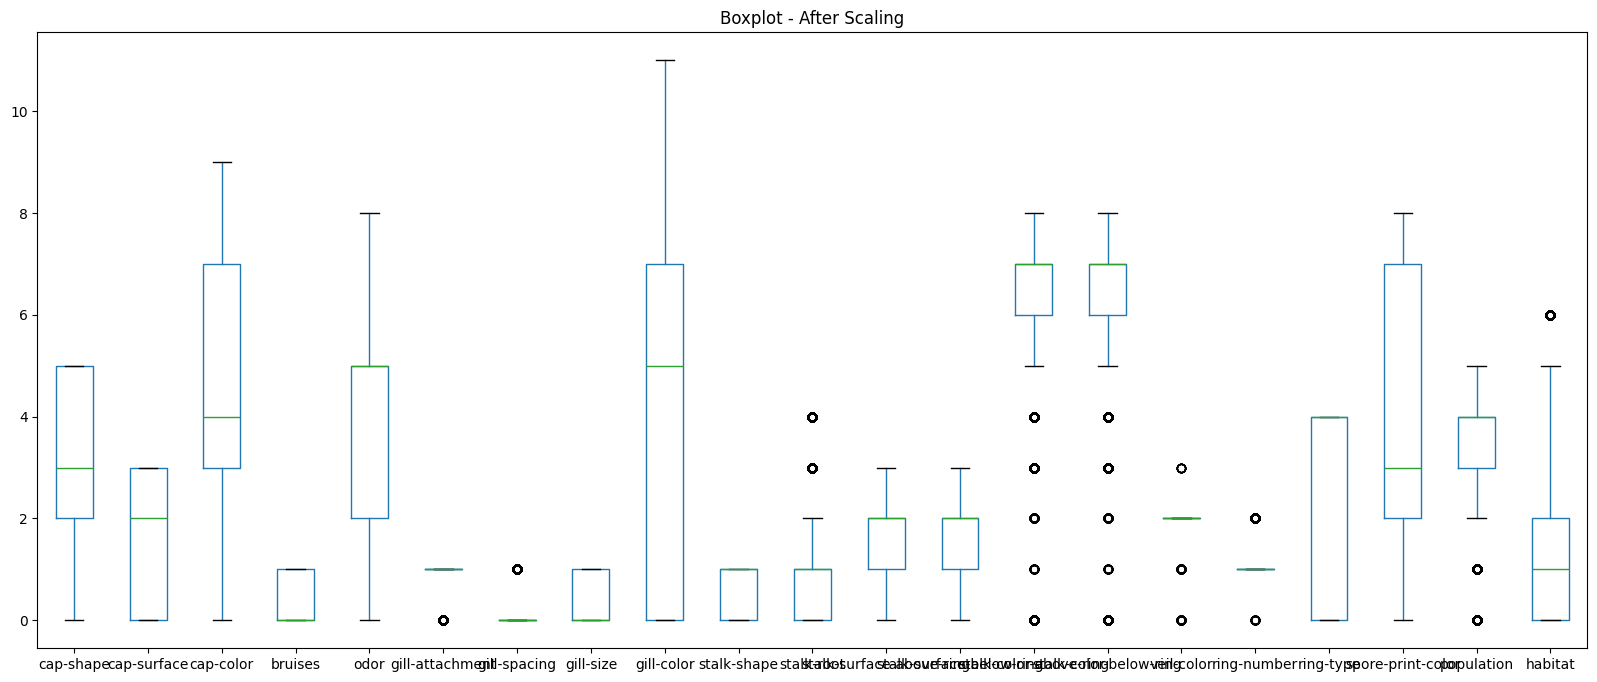

In [324]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - After Scaling')
plt.show()

# Correlation

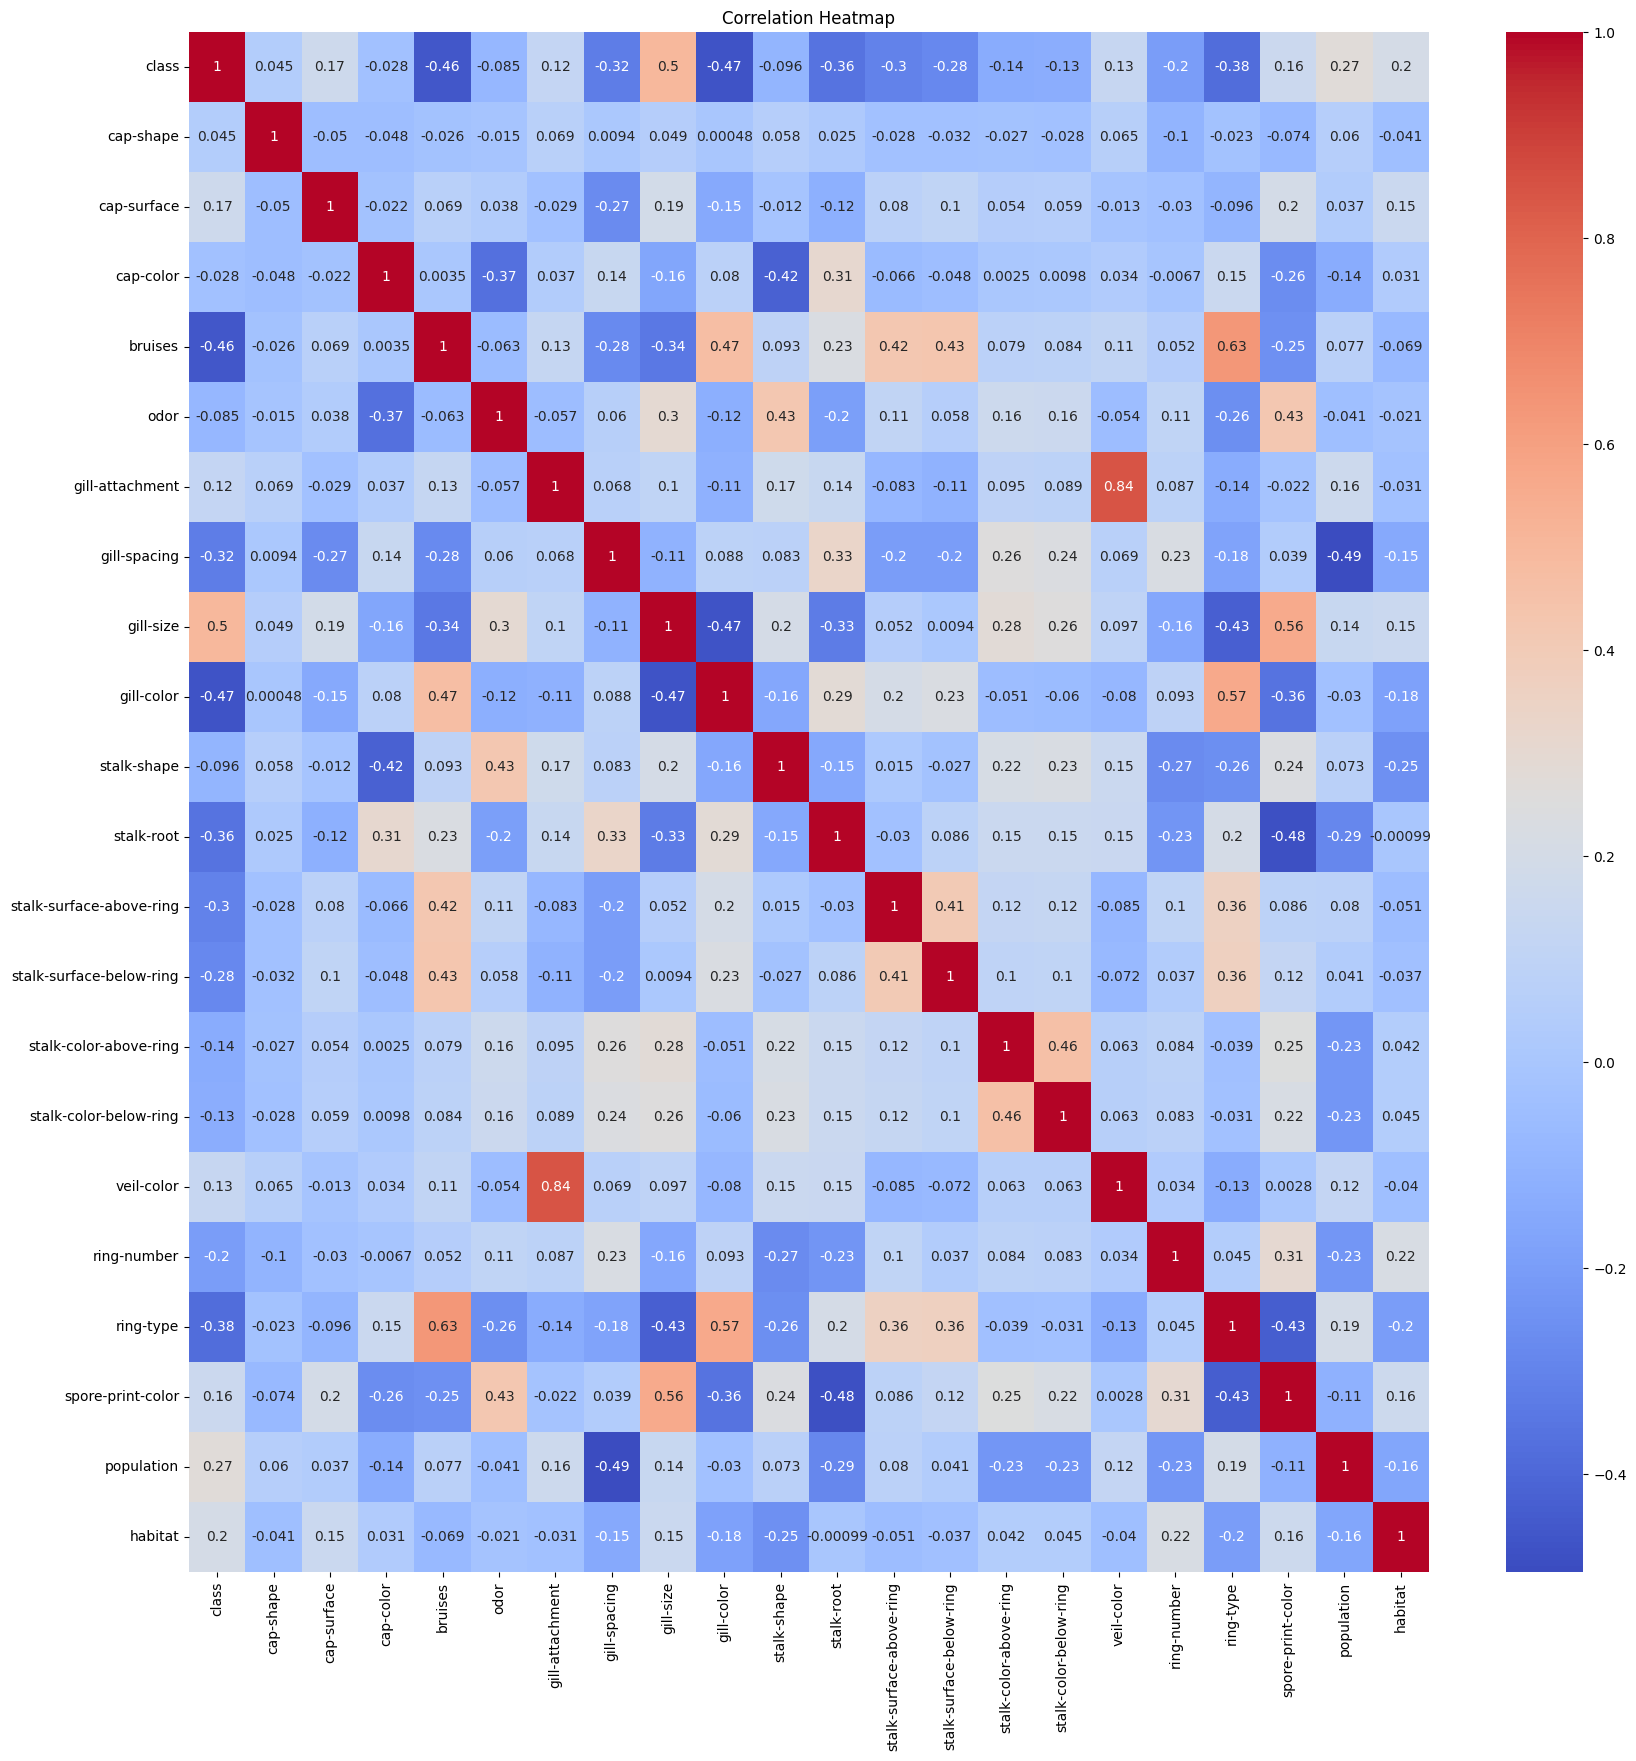

In [325]:
corrMatrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Splitting, Training and Testing

In [326]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40, stratify=y)

In [327]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5686 entries, 5453 to 7836
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 5686 non-null   int64
 1   cap-surface               5686 non-null   int64
 2   cap-color                 5686 non-null   int64
 3   bruises                   5686 non-null   int64
 4   odor                      5686 non-null   int64
 5   gill-attachment           5686 non-null   int64
 6   gill-spacing              5686 non-null   int64
 7   gill-size                 5686 non-null   int64
 8   gill-color                5686 non-null   int64
 9   stalk-shape               5686 non-null   int64
 10  stalk-root                5686 non-null   int64
 11  stalk-surface-above-ring  5686 non-null   int64
 12  stalk-surface-below-ring  5686 non-null   int64
 13  stalk-color-above-ring    5686 non-null   int64
 14  stalk-color-below-ring    5686 non-null   

In [328]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 6743 to 1731
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 2438 non-null   int64
 1   cap-surface               2438 non-null   int64
 2   cap-color                 2438 non-null   int64
 3   bruises                   2438 non-null   int64
 4   odor                      2438 non-null   int64
 5   gill-attachment           2438 non-null   int64
 6   gill-spacing              2438 non-null   int64
 7   gill-size                 2438 non-null   int64
 8   gill-color                2438 non-null   int64
 9   stalk-shape               2438 non-null   int64
 10  stalk-root                2438 non-null   int64
 11  stalk-surface-above-ring  2438 non-null   int64
 12  stalk-surface-below-ring  2438 non-null   int64
 13  stalk-color-above-ring    2438 non-null   int64
 14  stalk-color-below-ring    2438 non-null   

In [329]:
yTrain.info()

<class 'pandas.core.series.Series'>
Index: 5686 entries, 5453 to 7836
Series name: class
Non-Null Count  Dtype
--------------  -----
5686 non-null   int64
dtypes: int64(1)
memory usage: 88.8 KB


In [330]:
yTest.info()

<class 'pandas.core.series.Series'>
Index: 2438 entries, 6743 to 1731
Series name: class
Non-Null Count  Dtype
--------------  -----
2438 non-null   int64
dtypes: int64(1)
memory usage: 38.1 KB


# Models

## Decision Tree

In [331]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(xTrain, yTrain)

ypredDT = modelDT.predict(xTest)

# Accuracy
accuracyDT = round(accuracy_score(yTest, ypredDT) * 100, 2)

print(accuracyDT)

94.22


## Random Forest

In [332]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(xTrain, yTrain)

ypredRF = modelRF.predict(xTest)

# accuracy
accuracyRF = round(accuracy_score(yTest, ypredRF)*100, 2)

print(accuracyRF)

97.01


## KNN

In [333]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
modelKNN = KNeighborsClassifier(n_neighbors=k)
modelKNN.fit(xTrain, yTrain)

# predict
ypredKNN = modelKNN.predict(xTest)

# accuracy
accuracyKNN = round(accuracy_score(yTest, ypredKNN) * 100, 2)
print(accuracyKNN)

95.65


# Model Comparison

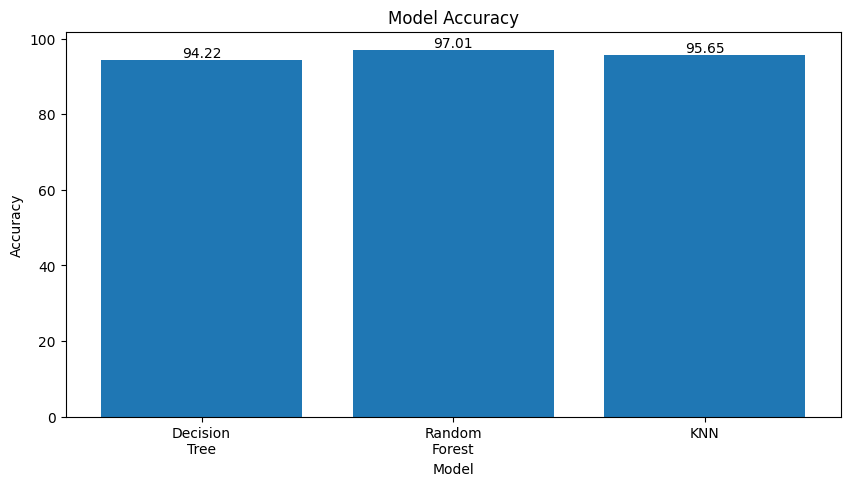

In [334]:
models = [ 'Decision\nTree', 'Random\nForest', 'KNN' ]
accuracies = [ accuracyDT, accuracyRF, accuracyKNN ]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, tick_label=models)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for i in range(len(models)):
    plt.text(models[i], accuracies[i], str(accuracies[i]), ha='center', va='bottom')

plt.show()

# Precision and Recall Comparison

In [335]:
# List of models and their predictions
models = [
    ('Decision Tree', ypredDT),
    ('Random Forest', ypredRF),
    ('KNN', ypredKNN)
]

# result matrix
matrix = []

for model, yPred in models:
    precision = precision_score(yTest, yPred, average='weighted')
    recall = recall_score(yTest, yPred, average='weighted')

    matrix.append({'Model': model, 'Precision': precision, 'Recall': recall})

# Convert the list of dictionaries to a DataFrame
matrixDF = pd.DataFrame(matrix)
print(matrixDF)

           Model  Precision    Recall
0  Decision Tree   0.942163  0.942166
1  Random Forest   0.971060  0.970057
2            KNN   0.956811  0.956522


# Confusion Matrix

## Decision Tree

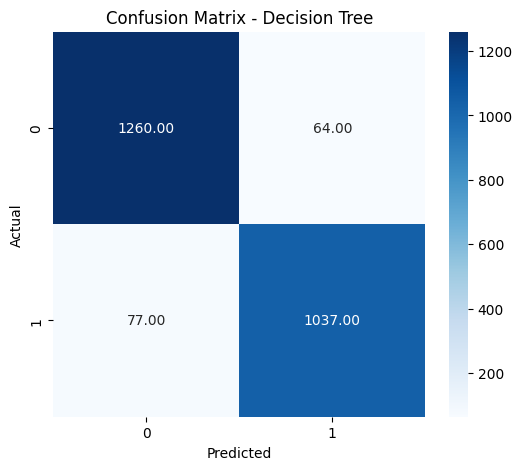

In [336]:
cmDT = confusion_matrix(yTest, ypredDT)

# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(cmDT, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

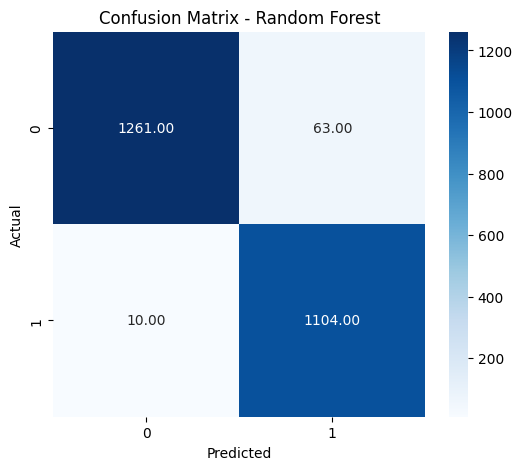

In [337]:
cmRF = confusion_matrix(yTest, ypredRF)

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cmRF, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

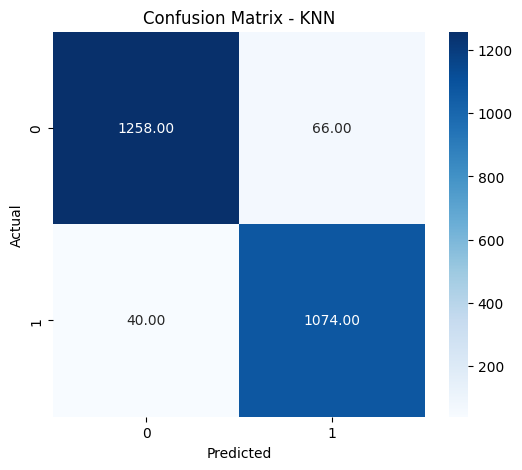

In [338]:
cmKNN = confusion_matrix(yTest, ypredKNN)

# Plotting the confusion matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(cmKNN, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - KNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()